In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
M_sol = 2e33
c = 3e10
G = 6.67e-8

In [4]:
def F(R, M, M_dot):
    return (3 * G * M * M_dot) / (8 * 3.14 * R**3) * (1 - (R_in / R)**(1/2))

In [5]:
class BH:
    def __init__(self, m, m_dot):
        self.m         = m
        self.M         = m * M_sol
        self.M_dot_edd = 2e18 * m
        self.m_dot     = m_dot
        self.M_dot     = m_dot * self.M_dot_edd
        self.R_s       = 2 * G * self.M / c**2
        self.R_in      = 3 * self.R_s
        
        self.L         = quad(self.F, 3*self.R_s, 100000*self.R_s)[0]
        self.L_err     = quad(self.F, 3*self.R_s, 100000*self.R_s)[1]
    
    def F(self, R):
        return (3 * G * self.M * self.M_dot) / (8 * np.pi * R**3) * (1 - (self.R_in / R)**(1/2))

In [8]:
bh1 = BH(10,0.5)
bh2 = BH(1,1)
bh3 = BH(10,0.1)
bh4 = BH(1, 0.1)

In [9]:
R_ = np.linspace(R_s, 100*R_s, 1000)
R2_ = np.linspace(3*R_s, 100*R_s, 1000)

NameError: name 'R_s' is not defined

In [10]:
plt.figure(figsize=(6,5))

plt.plot(R_ / R_s, F(R_, M1, M_dot1), color='black', lw=1.0, label=fr'$M/M_{{\odot}}={m1}$     $\dot{{m}}={m_dot1}$     $L\sim${L1:.0e} $\mathrm{{erg \ s^{-1}}}$')
plt.plot(R_ / R_s, F(R_, M4, M_dot4), color='black', lw=1.0, label=fr'$M/M_{{\odot}}={m4}$       $\dot{{m}}={m_dot4}$     $L\sim${L4:.0e} $\mathrm{{erg \ s^{-1}}}$', ls='--')

plt.plot(R2_ / R_s, 1e43*R2_**-3/4, color='red', lw=1.0, ls='--')
plt.text(30,5e18, s='$\propto R^{-3/4}$', color='red', size=20)
#plt.axvline(3, color='black', ls='dotted')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('$D(R)$   Flux ($\mathrm{erg \ s^{-1} \ cm^{-2}}$)', size=15)
plt.xlabel('Radius ($R_{s}$)', size=15)
plt.xticks(ticks=[1,3,10,100], labels=[1,'$R_{\mathrm{in}}=$3',10,100], size=15)
plt.yticks(size=15)
plt.legend(loc='upper right', prop={'size': 11})
plt.xlim(1,100)
plt.ylim(1e18, 2e24)
plt.savefig('../figures/thin_disc_flux.pdf', bbox_inches='tight')
plt.savefig('../figures/thin_disc_flux.png', bbox_inches='tight')

plt.show()


NameError: name 'R_' is not defined

<Figure size 432x360 with 0 Axes>

In [ ]:
L_Edd = 1.26e38
def L(m_dot):
    return L_Edd * (1 + (3/5) * np.log(m_dot))

In [11]:
m_dot_ = np.linspace(0.1,1000,100000)

In [12]:
plt.figure(figsize=(6,6))
plt.plot(m_dot_, L(m_dot_))
#plt.loglog(m_dot_, L(m_dot_))
plt.yscale('log')
plt.xscale('log')
plt.xticks([0.1,1,10,100,1000], labels=[0.1,1,10,100,1000])
plt.yticks([1e36,1e37,1e38,L_Edd,1e39], labels=[36,37,'','$L_{\mathrm{Edd}}$',39])
plt.xlabel('$\dot{m}$')
plt.ylabel('Luminosity ($\mathrm{erg \ s^{-1}})$')
plt.grid()

NameError: name 'L' is not defined

<Figure size 432x432 with 0 Axes>

In [13]:
mdot_0 = 1
r_sp = mdot_0
def mdot_rsp(r):
    """ Mass accretion rate inside the spherization radius"""    
    return mdot_0 * (r/r_sp) * (1 + 2/3 * r**-(5/2)) / (1 + (2/3) * r_sp**-(5/2))

In [14]:
r_sp = 1
r1_ = np.linspace(0.1, r_sp, 1000)
r2_ = np.linspace(r_sp, 10, 1000)

plt.figure(figsize=(6,6))
plt.loglog(r1_, mdot_rsp(r_))
plt.loglog(r2_, [1]*len(r2_))
plt.axvline(r_sp, color='red', ls='--')
plt.xlabel('Radius')
plt.ylabel(r'$\frac{\dot{M}(r)}{\dot{M}_{\mathrm{Edd}}}$', size=20)


NameError: name 'r_' is not defined

<Figure size 432x432 with 0 Axes>

In [ ]:
def L_r_l_sp(m_dot_0, r_sp):
    return ((m_dot_0 / r_sp) * (np.log(r_sp) - (2/5)*(1-r_sp**-(5/2)))) / (1 + (2/3)*r_sp**-(5/2))

def L_r_ge_sp(m_dot_0, r_sp):
    return (5/3) * (m_dot_0 / r_sp) * 1 / (1 + (2/3)*r_sp**(-5/2))

In [ ]:
print(L_r_l_sp(10, 5), L_r_ge_sp(1, 5))

In [ ]:
m_dot_0_ = np.linspace(0.1,10,1000)
plt.figure(figsize=(6,6))
plt.plot(m_dot_0_, L_r_l_sp(m_dot_0_, 10), label='Luminosity from inside r_sp')
plt.plot(m_dot_0_, L_r_ge_sp(m_dot_0_, 10), label='Luminosity from outside r_sp')
plt.xlabel('mdot_0')
plt.ylabel('L/L_Edd')
plt.legend()
         

In [ ]:
def Q_rad(R):
    if 
    return 3 / (8*3.14) * (G*M)**0.5 * g(r)

In [ ]:
M_sol = 2e33
c = 3e10
G = 6.67e-8

# BH 1
m = 10
M = m * M_sol
M_edd = 2e18 * m
m_dot = 0.5
M_dot = m_dot * M_edd

R_s = 2 * G * M / c**2
R_in = 3 * R_s


g0 = M_edd * np.sqrt(G*M*R_in)

In [ ]:
g0

In [ ]:


def g_l_rsp(r, mdot_0, r_sp):
    return ((mdot_0 * r**(3/2)) / (3 * r_sp)) * (1-r**(-5/2)) / (1 + (2/3)*r_sp**(-5/2))

def g_ge_rsp(r, mdot_0, r_sp):
    return g_l_rsp(r_sp, mdot_0, r_sp) + mdot_0 * (r**0.5 - r_sp**0.5)

def g(r, mdot_0, r_sp):
    if r <= r_sp:
        return g_l_rsp(r, mdot_0, r_sp)
    elif r > r_sp:
        return g_ge_rsp(r, mdot_0, r_sp)
        
    

In [15]:
r1_ = np.linspace(R_s, R_in, 1000)
r2_ = np.linspace(R_in, 10*R_in, 1000)

y1 = g0 * g_l_rsp(r1_, 10, R_in)
y2 = g0 * g_ge_rsp(r2_, 10, R_in)

plt.figure(figsize=(6,6))
plt.plot(r1_, y1)
#plt.loglog(r2_, y2)
plt.ylabel('g ($cm/s^{2}$)')
plt.xlabel('r (cm)')



NameError: name 'R_s' is not defined

In [16]:
def Q_rad(R, mdot_0, r_sp):
    return 3 / (8*3.14) * ((G*M)**0.5 * g(r, mdot_0, r_sp)) / R**(7/2)

In [17]:
R_ = np.linspace(

SyntaxError: incomplete input (3081661948.py, line 1)

In [18]:
def H_R(r, mdot_0):
    return mdot_0 * (3/r) * (1-r**-0.5)

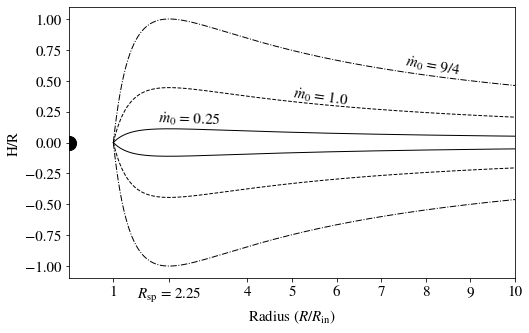

In [19]:
r_ = np.linspace(1,20,1000)
plt.figure(figsize=(8,5))


y1=H_R(r_, 0.25)
y2=H_R(r_, 1.0)
y3=H_R(r_, 9/4)
y4=H_R(r_, 2*9/4)

R_sp = r_[np.argmax(y1)]

plt.plot(r_, y1, color='black', lw=1.0)
plt.plot(r_, y2, color='black', ls='--', lw=1.0)
plt.plot(r_, y3, color='black', ls='-.', lw=1.0)
plt.plot(r_, -y1, color='black', lw=1.0)
plt.plot(r_, -y2, color='black', ls='--', lw=1.0)
plt.plot(r_, -y3, color='black', ls='-.', lw=1.0)




#plt.scatter(R_sp, max(y1), color='black')
#plt.scatter(R_sp, max(y2), color='black')
#plt.scatter(R_sp, max(y3), color='black')

plt.scatter(0,0,s=200, color='black')

plt.xticks([1,r_[np.argmax(y2)],4,5,6,7,8,9,10], [1,f'$R_{{\mathrm{{sp}}}}$ = 2.25',4,5,6,7,8,9,10], size=15)
plt.yticks(size=15)
plt.text(2, 0.15, s=r'$\dot{m}_{0}$ = 0.25', size=15, rotation=-2)
plt.text(5, 0.3, s=r'$\dot{m}_{0}$ = 1.0', size=15, rotation=-8)
plt.text(7.5, 0.55, s=r'$\dot{m}_{0}$ = 9/4', size=15, rotation=-10)

plt.xlabel('Radius ($R / R_{\mathrm{in}}$)', size=15)
plt.ylabel('$\mathrm{H/R}$', size=15)
plt.xlim(0,10)

plt.savefig('../figures/H_R_v_radius.pdf', bbox_inches='tight')
plt.savefig('../figures/H_R_v_radius.png', bbox_inches='tight')




In [20]:
?plt.grid

Signature: plt.grid(visible=None, which='major', axis='both', **kwargs)
Docstring:
Configure the grid lines.

Parameters
----------
visible : bool or None, optional
    Whether to show the grid lines.  If any *kwargs* are supplied, it
    is assumed you want the grid on and *visible* will be set to True.

    If *visible* is *None* and there are no *kwargs*, this toggles the
    visibility of the lines.

which : {'major', 'minor', 'both'}, optional
    The grid lines to apply the changes on.

axis : {'both', 'x', 'y'}, optional
    The axis to apply the changes on.

**kwargs : `.Line2D` properties
    Define the line properties of the grid, e.g.::

        grid(color='r', linestyle='-', linewidth=2)

    Valid keyword arguments are:

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
    alpha: scalar or None
    animated: bool
    antialiased or aa: bool
    clip_box: `.Bbox`
    clip_on: bool
    clip_

In [21]:
r_[139]

3.6436436436436437

In [22]:
def r_sph(m_dot, e_wind):
    """Spherization radius in units of r_isco, from poutanen 2007"""
    return 1.34*m_dot - 0.4*e_wind*m_dot + 0.1 * e_wind**2 * m_dot - (1.1-0.7*e_wind)*m_dot**1/3

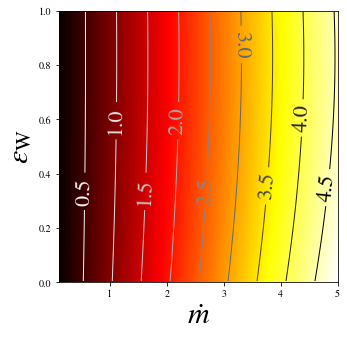

In [30]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
 
xmax = 5.0
x = np.linspace(0.1, xmax, 100)
y = np.linspace(0.0, 1.0, 100)
X,Y = meshgrid(x, y) # grid of point
Z = r_sph(X, Y) # evaluation of the function on the grid

fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(Z,cmap=cm.hot,extent=[min(x),max(x),min(y),max(y)], aspect='auto', origin='lower') # drawing the function
# adding the Contour lines with labels
cset = ax.contour(Z, arange(0, xmax, 0.5), linewidths=1, cmap=cm.Greys, extent=[min(x),max(x),min(y),max(y)], origin='lower')
ax.clabel(cset, inline=True, fmt='%1.1f', fontsize=22)
ax.set_xlabel('$\dot{m}$', size=30)
ax.set_ylabel('$\epsilon_{\mathrm{W}}$', size=30)

#plt.colorbar(im, location='top', pad=0.01) # adding the colobar on the right
#plt.suptitle('R_sph')
# latex fashion title
#plt.title('R_sph')
show()

In [50]:
def P_wind_lo_spin(M, r_out):
    M_sol = 2e33
    c = 3e10
    G = 6.67e-8
    day = (24*60*60)
    a_spin = 0.01
    
    R_g = G*M*M_sol / c**2
    r_isco = 6 * R_g
    r_out  = r_out*r_isco
    
    a = (G*M*M_sol*np.pi) / (3*a_spin*c**3)
    b = (1 - (r_isco/r_out)**3) / (np.log(r_out/r_isco))
    P_wind = a * (r_out/R_g)**3 * b
    P_wind_days = P_wind / day
    return P_wind_days

def P_wind_hi_spin(M, r_out):
    M_sol = 2e33
    c = 3e10
    G = 6.67e-8
    day = (24*60*60)
    a_spin = 0.998
    
    R_g = G*M*M_sol / c**2
    r_isco = 6 * R_g
    r_out  = r_out*r_isco
    
    a = (G*M*M_sol*np.pi) / (3*a_spin*c**3)
    b = (1 - (r_isco/r_out)**3) / (np.log(r_out/r_isco))
    P_wind = a * (r_out/R_g)**3 * b
    P_wind_days = P_wind / day
    return P_wind_days

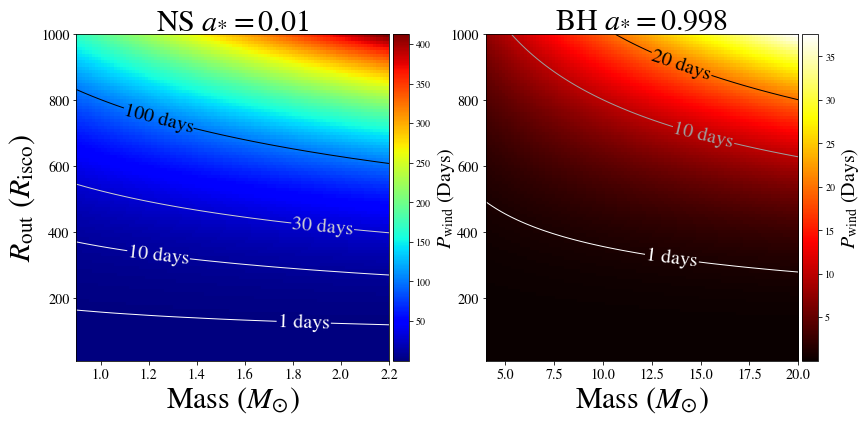

In [65]:
xmax = 20
x1 = np.linspace(0.9, 2.2, 100) # Solar Mass
x2 = np.linspace(4, 20, 100)    # Solar Mass
y = np.linspace(10, 1000, 100)    # R_out

X1,Y1 = meshgrid(x1, y)            # grid of point
X2,Y2 = meshgrid(x2, y)            # grid of point
Z1 = P_wind_lo_spin(X1, Y1)                # evaluation of the function on the grid
Z2 = P_wind_hi_spin(X2, Y2)                # evaluation of the function on the grid

fig, ax = plt.subplots(1,2,figsize=(14,6), facecolor='white')
im1 = ax[0].imshow(Z1, cmap=cm.jet, extent=[min(x1),max(x1),min(y),max(y)], aspect='auto', origin='lower') # drawing the function
im2 = ax[1].imshow(Z2, cmap=cm.hot, extent=[min(x2),max(x2),min(y),max(y)], aspect='auto', origin='lower') # drawing the function

# adding the Contour lines with labels
cset1 = ax[0].contour(Z1, [1,10,30,100], linewidths=1, cmap=cm.Greys, extent=[min(x1),max(x1),min(y),max(y)])
cset2 = ax[1].contour(Z2, [1,10,20], linewidths=1, cmap=cm.Greys, extent=[min(x2),max(x2),min(y),max(y)])

ax[0].clabel(cset1, inline=True, fmt='%1.0f days', fontsize=20)
ax[1].clabel(cset2, inline=True, fmt='%1.0f days', fontsize=20)

ax[0].set_title(r'NS $a_{*} = 0.01$', size=30)
ax[1].set_title(r'BH $a_{*} = 0.998$', size=30)

ax[0].set_xlabel('$\dot{m}$', size=30)
ax[0].set_ylabel('$\epsilon_{\mathrm{W}}$', size=30)

ax[0].set_xlabel(r'Mass ($M_{\odot}$)', size=30)
ax[1].set_xlabel(r'Mass ($M_{\odot}$)', size=30)
ax[0].set_ylabel(r'$R_{\mathrm{out}} \ (R_{\mathrm{isco}})$', size=30)

ax[0].tick_params(axis='both', labelsize=14)
ax[1].tick_params(axis='both', labelsize=14)

cbar = plt.colorbar(im1, ax=ax[0], location='right', pad=0.01)
cbar.set_label(label='$P_{\mathrm{wind}}$ (Days)', size=20)
cbar2 = plt.colorbar(im2, ax=ax[1], location='right', pad=0.01)
cbar2.set_label(label='$P_{\mathrm{wind}}$ (Days)', size=20)

plt.subplots_adjust(wspace=0.1)
plt.savefig('../figures/NS_BH_P_WIND.pdf', bbox_inches='tight')
plt.savefig('../figures/NS_BH_P_WIND.png', bbox_inches='tight')

plt.show()